# **회귀 분석 모델 만들기**





# Dummy variables

## Import the relevant libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set()

## Load the data

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.csv_read('/content/drive/MyDrive/Python Course/Udemy/1.03.+Dummies.csv')

In [50]:
df.head(5)

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


In [51]:
df.describe(include='all')

,SAT,GPA,Attendance
count,84.000000,84.000000,84
unique,NaN,NaN,2
top,NaN,NaN,No
freq,NaN,NaN,45
mean,1845.273810,3.330238,NaN
std,104.530661,0.271617,NaN
min,1634.000000,2.400000,NaN
25%,1772.000000,3.190000,NaN
50%,1846.000000,3.380000,NaN
75%,1934.000000,3.502500,NaN


In [62]:
df['Attendance'].unique
df['Attendance'].value_counts()

Attendance
No     45
Yes    39
Name: count, dtype: int64

## Map the data

In [53]:
data = df.copy()

In [63]:
data['Attendance'] = data['Attendance'].map({'Yes' : 1, 'No' : 0})

In [64]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


## Regression

In [71]:
y = data['GPA']
x1 = data[['SAT', 'Attendance']]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           2.19e-15
Time:                        20:17:45   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Insights
If you actually compare with the OLS without attendance, the model improved:

R-sqaured: 0.406 -> 0.565

Adj R: 0.399 -> 0.555

F-STAT: 56.05 -> 52.70

constant P: 0.503 -> 0.076

SAT: 0.00 -> 0.00

Attendance: 0.00

## Plot the regression line(s) on the scatter plot

## The calculation behind

yhat_no:
GPA = 0.6439 + 0.0014 * SAT + 0.2226 * Dummy

***GPA = 0.6439 + 0.0014 * SAT***

yhat_yes:
GPA = 0.6439 + 0.0014 * SAT + 0.2226
GPA = 0.8665 + 0.0014 * SAT


Text(0, 0.5, 'GPA')

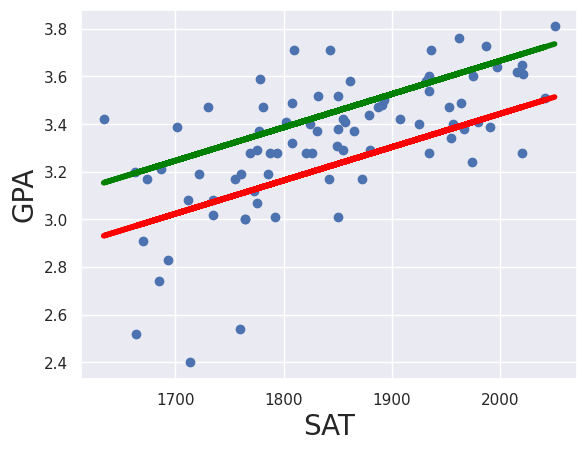

In [85]:
plt.scatter(data['SAT'], y)
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
plt.plot(data['SAT'], yhat_no, lw = 4, c = 'red')
plt.plot(data['SAT'], yhat_yes, lw = 4, c = 'green')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)


## Plot the regression line(s) on the scatter plot and colour the data points

Text(0, 0.5, 'GPA')

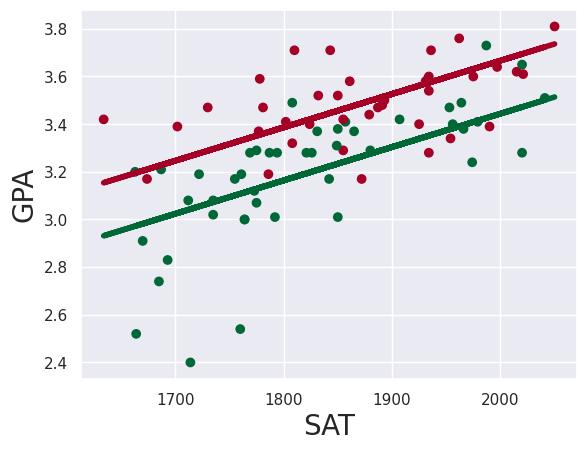

In [95]:
plt.scatter(data['SAT'], y, c=data['Attendance'], cmap = 'RdYlGn_r')

plt.plot(data['SAT'], yhat_no, lw = 4, c='#006837')
plt.plot(data['SAT'], yhat_yes, lw = 4, c='#a50026')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
#c=data['Attendance] 는 함수는 각 점에 색상을 넣는다
#cmap = 'RdYlGn_r' 함수는 어떤 색상을 넣을지 설정한다


## Add the original regression line for comparison

Text(0, 0.5, 'GPA')

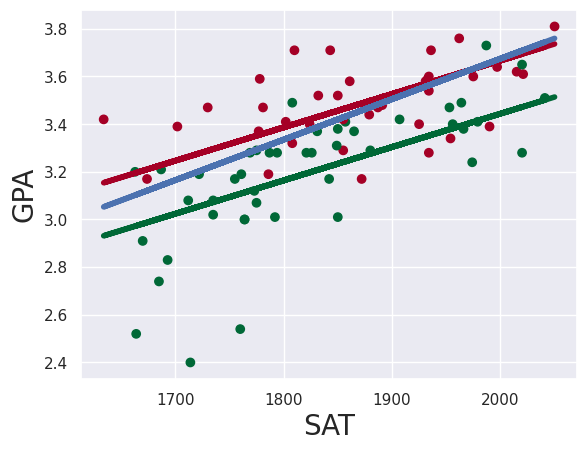

In [94]:
plt.scatter(data['SAT'], y, c=data['Attendance'], cmap = 'RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
yhat = 0.0017*data['SAT'] + 0.275
plt.plot(data['SAT'], yhat_no, lw = 4, c = '#006837')
plt.plot(data['SAT'], yhat_yes, lw = 4, c = '#a50026')
plt.plot(data['SAT'], yhat, lw = 4, c = '#4C72B0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)


# How to make predictions based on the regression we create

EX:

Bob, who got 1700 on the SAT and did not attend

Alice, who got 1670 on the SAT and attended



In [96]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [102]:
new_data = pd.DataFrame({'const' : 1, 'SAT' : [1700, 1670], 'Attendance' : [0,1]})
new_data = new_data[['const', 'SAT', 'Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [103]:
new_data.rename(index = {0 : 'Bob', 1 : 'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [104]:
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [106]:
predictionsdf = pd.DataFrame({'Predictions' : predictions})
joined = new_data.join(predictionsdf)
joined.rename(index = {0 : 'Bob' , 1 : 'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
